Jahnvi Shah
<br>2018130047

##Experiment 2

**Objective**: To implement and use Principal Component Analysis using Python Platform 

General Steps:

1. Load the dataset (Use pandas)

2. Data Preprocessing (Handling NA values)

3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, energy-plot etc) Use matplotlib (What variables to include, sample size)

4. Apply Normalization and Generate Covariance Matrix

5. Apply PCA

6. Build the model, summarize it and evaluate the model and Summarize

7. Tuning the model

##PCA

There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

1) Feature Elimination
<br>2) Feature Extraction

Mathematically the main objective of PCA is to:

1. Find an orthonormal basis for the data.

2. Sort dimensions in the order of importance.

3. Discard the low significance dimensions.

4. Focus on uncorrelated and Gaussian components.

When X1 and X2 are dependent on each other, then these variables end up interacting with each other. In other words, there is a correlation present amongst them. When two independent variables are very strongly interacting with each other, that is the correlation coefficient is close to 1 then we are providing the same information to the algorithm in two dimensions, which is nothing but redundancy. This unnecessarily increases the dimensionality of the features of the mathematical space. When we have too many dimensions more than required then we are exposing ourselves to the Curse of Dimensionality.

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc, r2_score

###1. Load the dataset (Using pandas)

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df = pd.read_csv('drive/MyDrive/Datasets/Car/auto-mpg.csv', na_values = "?", comment = "\t", skipinitialspace = True) 

data=pd.DataFrame(df)

Mounted at /content/drive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


###2. Data Preprocessing

In [ ]:
print(data.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
#replacing NA values of hoursepower column with mean value
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].mean())

print(data.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# drop car name column
data.drop(['car name'], inplace = True, axis = 1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


###3.Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation between different fearures')

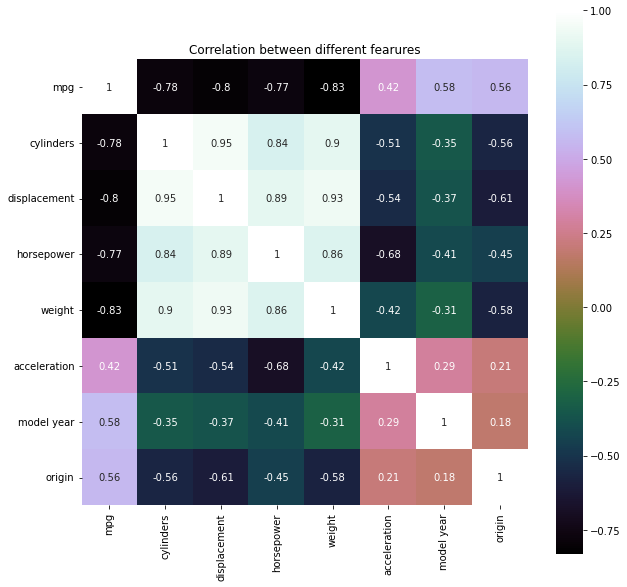

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [ ]:
X = data.drop(columns=['mpg'])
y = data['mpg']
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

###4.Apply Normalization and Generate Covariance Matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
##Covariance Matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00251889  0.95311615  0.84105256  0.89827376 -0.50669259 -0.34962425
  -0.56396033]
 [ 0.95311615  1.00251889  0.89589723  0.93517383 -0.54505356 -0.37109656
  -0.61094444]
 [ 0.84105256  0.89589723  1.00251889  0.86274199 -0.6859827  -0.4126879
  -0.45481206]
 [ 0.89827376  0.93517383  0.86274199  1.00251889 -0.41850885 -0.30733654
  -0.58248745]
 [-0.50669259 -0.54505356 -0.6859827  -0.41850885  1.00251889  0.28886274
   0.20639158]
 [-0.34962425 -0.37109656 -0.4126879  -0.30733654  0.28886274  1.00251889
   0.18111726]
 [-0.56396033 -0.61094444 -0.45481206 -0.58248745  0.20639158  0.18111726
   1.00251889]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00251889  0.95311615  0.84105256  0.89827376 -0.50669259 -0.34962425
  -0.56396033]
 [ 0.95311615  1.00251889  0.89589723  0.93517383 -0.54505356 -0.37109656
  -0.61094444]
 [ 0.84105256  0.89589723  1.00251889  0.86274199 -0.6859827  -0.4126879
  -0.45481206]
 [ 0.89827376  0.93517383  0.86274199  1.00251889 -0.41850885 -0.30733654
  -0.58248745]
 [-0.50669259 -0.54505356 -0.6859827  -0.41850885  1.00251889  0.28886274
   0.20639158]
 [-0.34962425 -0.37109656 -0.4126879  -0.30733654  0.28886274  1.00251889
   0.18111726]
 [-0.56396033 -0.61094444 -0.45481206 -0.58248745  0.20639158  0.18111726
   1.00251889]]


Text(0.5, 1.0, 'Correlation between different features')

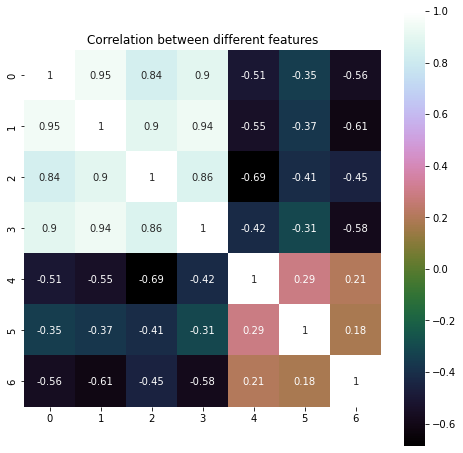

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [ ]:
#eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.43862683 -0.11407739  0.02634794  0.24370468  0.68491672 -0.45261713
  -0.24603555]
 [-0.45396453 -0.10535161  0.02428128  0.16138957  0.17977894  0.84975536
  -0.04214764]
 [-0.43706212  0.13929117  0.17683559  0.11617996 -0.61194248 -0.14321108
  -0.5914584 ]
 [-0.43230831 -0.20307205 -0.00510785  0.33523041 -0.31622223 -0.21724932
   0.71573178]
 [ 0.29765673 -0.48625222 -0.55053864  0.53307937 -0.13422769  0.02860109
  -0.26240759]
 [ 0.21479741 -0.63524052  0.73828912  0.02598658 -0.02117057  0.0113014
  -0.06332078]
 [ 0.2981132   0.5246669   0.34533416  0.70981357  0.07505502  0.06634103
   0.05222826]]

Eigenvalues 
[4.61070498 0.94195348 0.7504296  0.48207565 0.13483114 0.03379454
 0.06384286]


###5. Apply PCA

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.610704983135298
0.941953476112717
0.7504295981946147
0.4820756498790898
0.1348311351882661
0.06384285819434009
0.033794541109280346


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

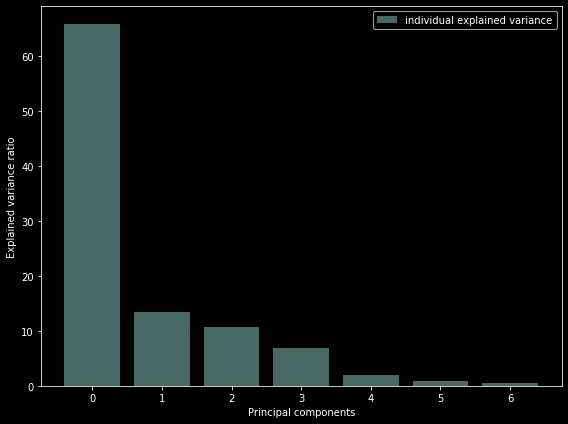

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.43862683 -0.11407739]
 [-0.45396453 -0.10535161]
 [-0.43706212  0.13929117]
 [-0.43230831 -0.20307205]
 [ 0.29765673 -0.48625222]
 [ 0.21479741 -0.63524052]
 [ 0.2981132   0.5246669 ]]


In [ ]:
Y = X_std.dot(matrix_w)
Y

array([[-2.66582768e+00,  9.67827740e-01],
       [-3.40487799e+00,  1.09500795e+00],
       [-3.01621594e+00,  1.22259508e+00],
       [-2.84558047e+00,  1.06093052e+00],
       [-2.89258892e+00,  1.28742374e+00],
       [-4.62063326e+00,  1.24480833e+00],
       [-5.09636495e+00,  1.47326650e+00],
       [-5.01062413e+00,  1.56753259e+00],
       [-5.08622236e+00,  1.29691491e+00],
       [-4.27011580e+00,  1.63776580e+00],
       [-3.70167426e+00,  1.37591380e+00],
       [-3.63932494e+00,  1.72495546e+00],
       [-3.70190152e+00,  1.32642910e+00],
       [-4.40180948e+00,  1.61841030e+00],
       [ 1.26071190e+00,  2.35700170e+00],
       [-5.52105523e-01,  6.27799453e-01],
       [-5.49219771e-01,  6.48255838e-01],
       [-2.66487145e-01,  5.60056743e-01],
       [ 1.48031076e+00,  2.49400924e+00],
       [ 2.38853350e+00,  6.97231436e-01],
       [ 1.11012446e+00,  1.16245152e+00],
       [ 8.88310559e-01,  1.76418779e+00],
       [ 1.19643912e+00,  1.26903969e+00],
       [ 4.

Text(0, 0.5, 'Cumulative explained variance')

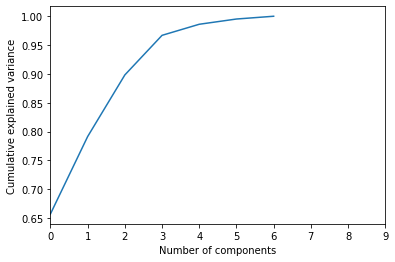

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print(Y_sklearn)

[[ 2.66582768e+00  9.67827740e-01]
 [ 3.40487799e+00  1.09500795e+00]
 [ 3.01621594e+00  1.22259508e+00]
 [ 2.84558047e+00  1.06093052e+00]
 [ 2.89258892e+00  1.28742374e+00]
 [ 4.62063326e+00  1.24480833e+00]
 [ 5.09636495e+00  1.47326650e+00]
 [ 5.01062413e+00  1.56753259e+00]
 [ 5.08622236e+00  1.29691491e+00]
 [ 4.27011580e+00  1.63776580e+00]
 [ 3.70167426e+00  1.37591380e+00]
 [ 3.63932494e+00  1.72495546e+00]
 [ 3.70190152e+00  1.32642910e+00]
 [ 4.40180948e+00  1.61841030e+00]
 [-1.26071190e+00  2.35700170e+00]
 [ 5.52105523e-01  6.27799453e-01]
 [ 5.49219771e-01  6.48255838e-01]
 [ 2.66487145e-01  5.60056743e-01]
 [-1.48031076e+00  2.49400924e+00]
 [-2.38853350e+00  6.97231436e-01]
 [-1.11012446e+00  1.16245152e+00]
 [-8.88310559e-01  1.76418779e+00]
 [-1.19643912e+00  1.26903969e+00]
 [-4.47829129e-01  2.23415415e+00]
 [ 4.58660478e-01  7.41225308e-01]
 [ 4.22235974e+00  6.04700103e-01]
 [ 3.58924508e+00  4.84388116e-01]
 [ 3.91693333e+00  7.73151609e-01]
 [ 3.29968478e+00 -2

In [ ]:
Y.shape

(398, 2)

In [ ]:
Y_sklearn.shape

(398, 2)

In [ ]:
X_std.shape

(398, 7)

In [ ]:
y.shape

(398,)

###6. Build Model and Evaluate Model

In [ ]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(Y_sklearn, y, test_size=0.20, random_state=2)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80,)


In [ ]:
# Building Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
y_pred = regressor.predict(X_test)
regressor.score(X_train,y_train) 

0.7121740286663955

In [ ]:
print("Root Mean Squared Error (RMSE): ", round(math.sqrt(mean_squared_error(y_test, y_pred)),5))

Root Mean Squared Error (RMSE):  3.88849


In [ ]:
regressor_score = regressor.score(X_test, y_test)
print("Score of Linear Regression Model: ", round(regressor_score, 5))

Score of Linear Regression Model:  0.75418


##Conclusion: 
I implemented dimensionaity reduction technique Principal Component Analysis (PCA). I understood why PCA is required and how to form principal components and thus implemented it. PCA reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.
It makes the training of algorithm faster by reducing the number of dimensions of the data.


